### Vending machine sales

##### Author: [Alejandro Salmerón](https://www.linkedin.com/in/alejandrosalme/)


#### 1. Problem
The objective of this project is to contribute to the expansion of the vending machines in New Jersey, by investigating the sales data for potential new locations.

#### 2. Preamble

Traditional expansion plans typically involve a combination of different strategies (Market Research, Feasibility or Business plan). Also, identifying potential locations for the new machines consider factors such as foot traffic, visibility or proximity to competitors. So based on what we find in the data and external search we will try to give some suggestions.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 3. Data loading

The dataset used represents vending machine data from various locations in Central New Jersey. The locations include a library, a mall, office location and a manufacturing locations.

In [6]:
df_raw_sales = pd.read_csv('vending_machine_sales.csv')
df_raw_sales.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [3]:
df_raw_sales.info() #9617 sales and some columns with empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

#### 4. Data Wrangling and EDA

a. Data overview

In [4]:
df_sales = df_raw_sales.copy()

print('Number of locations:', len(df_sales.Location.unique()))
print('Number of vending machines:', len(df_sales.Machine.unique()))
print('Number of total products:', len(df_sales.Product.unique())) #Machines could have more products but not sold (no transaction)
print('Number of categories:', len(df_sales.Category.unique()))
print('Number of transactions:', len(df_sales.Transaction.unique()))

Number of locations: 4
Number of vending machines: 5
Number of total products: 185
Number of categories: 5
Number of transactions: 9116


b. First let's check the empty values to see what can we do with them and drop data if necessary

In [5]:
isNa = df_sales.isna().any()
isNaValues = isNa[isNa == True].index.values

print("Columns with null values:", isNaValues, '\n')

for n in isNaValues:
    print("Total empty values in", n, ":", df_sales.isnull().sum().loc[n])

Columns with null values: ['Product' 'Category' 'MPrice'] 

Total empty values in Product : 6
Total empty values in Category : 267
Total empty values in MPrice : 3


In [6]:
df_sales[df_sales.Product.isna()]

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
1232,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14835073327,3/16/2022,Credit,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1431,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14873793590,3/24/2022,Cash,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1439,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14878665903,3/25/2022,Credit,120,2.0,1,120,2.0,1,2.0,3.25,3/30/2022
5500,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15469028445,8/2/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,8/2/2022
6947,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15690095789,9/19/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,9/19/2022
7460,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15779665847,10/6/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,10/6/2022


Some of them don't have Category and MPrice, also their status is 'Unlinked' which means the operation wasn't processed

In [7]:
#Remove unkown products
df_sales.dropna(subset=['Product'], inplace=True) 

In [8]:
df_sales[df_sales.Category.isna()]['Product'].unique() #Product without category

array(['Doritos Dinamita Chile Lemon', 'Doritos Spicy Nacho',
       'Mini Chips Ahoy - Go Paks', 'Oreo Mini - Go Paks',
       'Teddy Grahams - Go Paks', 'Starbucks Doubleshot Energy - Coffee',
       'Canada Dry - Ginger Ale & Lemonde', 'Canada Dry - Ginger Ale'],
      dtype=object)

In [9]:
df_sales.Category.unique() #4 unique classes

array(['Carbonated', 'Food', 'Non Carbonated', 'Water', nan], dtype=object)

As we only have 4 categories it's easy to know which one correspond to every single product, but to be ensure we can also check if there is other similar products information

In [10]:
food = ['Doritos Dinamita Chile Lemon', 'Doritos Spicy Nacho', 'Mini Chips Ahoy - Go Paks', 'Oreo Mini - Go Paks', 'Teddy Grahams - Go Paks']
non_carbonated = ['Starbucks Doubleshot Energy - Coffee']
carbonated=['Canada Dry - Ginger Ale & Lemonde', 'Canada Dry - Ginger Ale']

In [11]:
#Example
df_sales[df_sales.Product.str.contains('Doritos')][['Product','Category']].iloc[0] #Check Category from a similar product

Product     Doritos Famin Hot Nacho
Category                       Food
Name: 551, dtype: object

In [12]:
#Fill missing values
from itertools import zip_longest

for f, n_c, c in zip_longest(food, non_carbonated, carbonated):
    df_sales.loc[df_sales.Product == f, 'Category'] = 'Food'
    df_sales.loc[df_sales.Product == n_c, 'Category'] = 'Non Carbonated'
    df_sales.loc[df_sales.Product == c, 'Category'] = 'Carbonated'

In [13]:
df_sales.isna().any() #Complete data

Status         False
Device ID      False
Location       False
Machine        False
Product        False
Category       False
Transaction    False
TransDate      False
Type           False
RCoil          False
RPrice         False
RQty           False
MCoil          False
MPrice         False
MQty           False
LineTotal      False
TransTotal     False
Prcd Date      False
dtype: bool

We can now drop columns that represents the same and have no information differences. We cannot drop RPrice or RQty because in this case machines support multiple item selection in a single transaction, that's why we also see see differences in the LineTotal value compared to TransTotal value which sums all the transaction item values.

In [14]:
print('Differences in price vs mapped price: ', df_sales[df_sales.RQty!=df_sales.MQty].values)
print('Differences in quantity sold vs quantity sold: ', df_sales[df_sales.RPrice!=df_sales.MPrice].values)
print('Unprocessed sales: ', df_sales[df_sales.Status!='Processed'].values)
print('Multiple selection operations: ')
df_sales[df_sales.RQty!=1].head()[['Product','Transaction', 'RQty']]

Differences in price vs mapped price:  []
Differences in quantity sold vs quantity sold:  []
Unprocessed sales:  []
Multiple selection operations: 


,Product,Transaction,RQty
24,KitKat - Crisp Wafers,14522947106,2
158,Vitamin Water - Ice Cool Blue Lavender,14571239689,2
195,Miss Vickie's Potato Chip - Sea Salt Original,14578233630,2
341,Poland Springs Water,14606042702,2
342,Keto Krisp - Almond Butter,14606049325,2


LineTotal 3$ - TransTotal 5.5 (Sum of transactions)

In [15]:
df_sales[df_sales.Transaction==14578233630]

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
195,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Miss Vickie's Potato Chip - Sea Salt Original,Food,14578233630,1/17/2022,Credit,114,1.5,2,114,1.5,2,3.0,5.5,1/17/2022
196,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Bai Antioxidant - Zambia Bingcherry,Non Carbonated,14578233630,1/17/2022,Credit,146,2.5,1,146,2.5,1,2.5,5.5,1/17/2022


In [16]:
df_sales.drop(columns={"Status", "Device ID", "MPrice", "MQty", "RCoil", "MCoil", "Prcd Date"}, inplace=True) #drop columns

In [17]:
df_sales.head()

,Location,Machine,Product,Category,Transaction,TransDate,Type,RPrice,RQty,LineTotal,TransTotal
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,3.5,1,3.5,3.5
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,3.5,1,3.5,5.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,1.5,1,1.5,5.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,1.5,1,1.5,1.5
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,3.5,1,3.5,3.5


c. Check the time span of the data, clean symbols and rename columns

In [18]:
df_sales.TransDate = pd.to_datetime(df_sales.TransDate) #Convert to datetime

In [19]:
print('Data from years: ', df_sales.TransDate.dt.year.unique())
print('Data from months: ', df_sales.TransDate.dt.month.unique())

Data from years:  [2022]
Data from months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [20]:
df_sales.Machine = df_sales.Machine.str.replace(r'x\d+\s-\s', '', regex=True) #Clean
df_sales.Product = df_sales.Product.str.replace(r'-\s', '', regex=True)
df_sales.Transaction = df_sales.Transaction.astype(str)

In [21]:
df_sales.rename(columns={"RPrice": "Price", "RQty": "Quantity"}, inplace=True)

In [22]:
df_sales.head()

,Location,Machine,Product,Category,Transaction,TransDate,Type,Price,Quantity,LineTotal,TransTotal
0,Brunswick Sq Mall,BSQ Mall ATT,Red Bull Energy Drink Sugar Free,Carbonated,14515778905,2022-01-01,Credit,3.5,1,3.5,3.5
1,Brunswick Sq Mall,BSQ Mall ATT,Red Bull Energy Drink Sugar Free,Carbonated,14516018629,2022-01-01,Credit,3.5,1,3.5,5.0
2,Brunswick Sq Mall,BSQ Mall ATT,Takis Hot Chilli Pepper & Lime,Food,14516018629,2022-01-01,Credit,1.5,1,1.5,5.0
3,Brunswick Sq Mall,BSQ Mall ATT,Takis Hot Chilli Pepper & Lime,Food,14516020373,2022-01-01,Credit,1.5,1,1.5,1.5
4,Brunswick Sq Mall,BSQ Mall ATT,Red Bull Energy Drink Sugar Free,Carbonated,14516021756,2022-01-01,Credit,3.5,1,3.5,3.5


d. Understanding and exploring the data

First thing that we see is that there aren't really expensive products, in average the consumed product price is near 2$, people use to buy only one product and the mayority (75%) of the product prices are under 2.5$

In [23]:
df_sales.describe().iloc[1:]

,Price,Quantity,LineTotal,TransTotal
mean,1.958381,1.014775,1.985667,2.220633
std,0.698778,0.127369,0.744427,1.084731
min,1.000000,1.000000,1.000000,1.000000
25%,1.500000,1.000000,1.500000,1.500000
50%,1.500000,1.000000,1.500000,2.000000
75%,2.500000,1.000000,2.500000,2.750000
max,5.000000,3.000000,8.000000,9.000000


If we look at the product prices per category, in average drinks have the higher prices. With non-carbonated products on the top followed by carbonated ones, water and lastly food

In [24]:
df_sales.groupby('Category')['Price'].mean()

Category
Carbonated        2.106335
Food              1.781644
Non Carbonated    2.624046
Water             1.821918
Name: Price, dtype: float64

In general more than half of the purchases are from food products. While from drinks, carbonated ones are the most seleccted choice

In [25]:
round(df_sales.Category.value_counts().div(len(df_sales)),2)*100

Food              57.0
Carbonated        25.0
Non Carbonated    11.0
Water              7.0
Name: Category, dtype: float64

Foot-traffic

Weekly, EB Public Library and GuttenPlans vending machines sells an average of 75 and 70 products each. Far surpassing the rest.

In [26]:
weekly_foot_traffic = df_sales.set_index('TransDate')
weekly_foot_traffic = weekly_foot_traffic.groupby('Machine')['Transaction'].resample('W').count()
weekly_foot_traffic = weekly_foot_traffic.reset_index()
weekly_foot_traffic.groupby('Machine')['Transaction'].mean()

Machine
BSQ Mall ATT               15.075472
BSQ Mall Zales             17.735849
EB Public Library x1380    75.642857
Earle Asphalt x1371        19.884615
GuttenPlans x1367          70.403846
Name: Transaction, dtype: float64

d. Visualizing the data

Let's remember that the locations are a library (EB Public Library), a mall (Brunswick), an office (Earle Asphalt) and a manufacturing company (GuttenPlans). 

The library and the manufacturing company are the ones with more products sells providing the most economic benefit as we see in the plots. One remarkable thing is that even though the library vending machine got less transactions than the company machine (3177 vs 3661), the total benefits from it are close to the ones from the manufacturing company machine (6827$ vs 7001$)

Also, there are two vending machines in the mall location and even being busy place, total transactions and revenue are about a half compared to the library machine. The office location is the less profitable machine with a bit more than 1000 sales.

In [27]:
def set_bar_label(ax):
    for i in ax.containers:
        ax.bar_label(i,)

def draw_barplot(x, y, hue, data, title):
    ax=sns.barplot(x=x,
                    y=y,
                    hue=hue,
                    data=data,
                    palette='muted',
                    estimator='sum')
    ax.set_title(title)
    set_bar_label(ax)

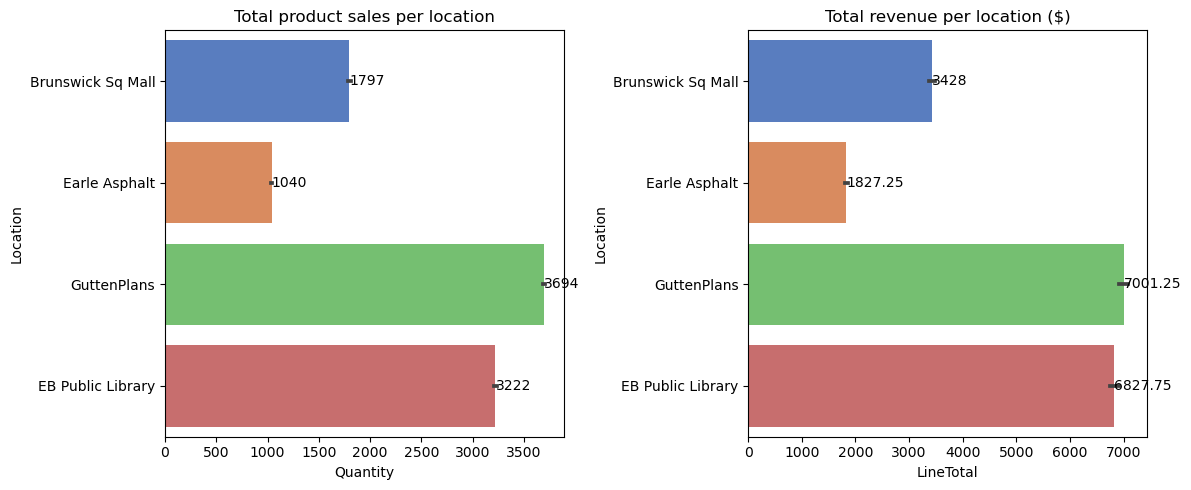

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
draw_barplot(x='Quantity', y='Location', hue=None,data=df_sales, title='Total product sales per location')

plt.subplot(1, 2, 2)  
draw_barplot(x='LineTotal', y='Location', hue=None, data=df_sales,title='Total revenue per location ($)')

plt.tight_layout()

In [29]:
print('Raw profit:', df_sales.LineTotal.sum(), '$')

Raw profit: 19084.25 $


e. Trends analysis

- Product tendency

    Understanding product type tendencies is crucial, for example, to effectively stock inventory or tail the product offerings to meet the preferences and demands of the clients

    Visualizing sells from the categories of each location we see that food is the best-selling product in all of them which was expected according to the percentages seen previously. 

    Surprisingly, only in the manufacturing company vending machine carbonated drinks are sold in a total quantity close to the food products (1529 vs 1814). It is generaly assumed that in places such as a library where students expend so many hours and need to be focused, this types of drink products are consumed in a higher way but this is not the case and snacks are prefered.

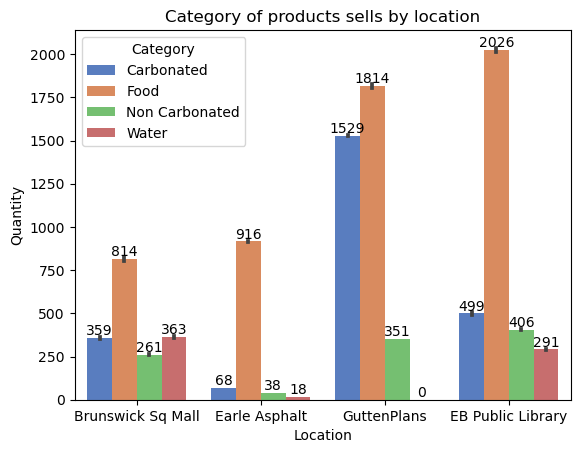

In [30]:
draw_barplot(x='Location', y='Quantity', hue='Category', data=df_sales, title='Category of products sells by location')

Unlike the vending machine at the mall, not many drinks are consumed at the office vending machine. If we take a look at the products consumed, we identify that in all the most consumed products there is a type of healthy trend. Additionally, compared to the rest of the locations, the amount of carbonated (6) and non-carbonated (4) products available is less.

In [31]:
df_sales[(df_sales.Category!='Food') & (df_sales.Location=='Earle Asphalt')].groupby('Category')['Product'].describe().iloc[:, 1:]

,unique,top,freq
Category,,,
Carbonated,6,Coca Cola Zero Sugar,17
Non Carbonated,4,Snapple Diet Tea Lemon,20
Water,4,BodyArmor LYTE Peach Mango,5


In [32]:
df_sales[(df_sales.Category!='Food') & (df_sales.Location!='Earle Asphalt')].groupby(list({'Location', 'Category'}))['Product'].nunique()

Category        Location         
Carbonated      Brunswick Sq Mall    14
                EB Public Library     9
                GuttenPlans           6
Non Carbonated  Brunswick Sq Mall    16
                EB Public Library    15
                GuttenPlans           8
Water           Brunswick Sq Mall    10
                EB Public Library     4
Name: Product, dtype: int64

Other thing to mention based on the plot is that there are no water bottle sells in the manufacturing company vending machine, it is rare that in a year not a single person buys a bottle of water. This is posible but also removing water bottles may have been a past decission took by the enterprise based on the sells. So could be that the machine don't have this type of product or, for example, coils with it do not work well which should be something to inform.

In [33]:
print('Water products in GuttenPlans:', len(df_sales.Product[(df_sales.Category=='Water') & (df_sales.Location=='GuttenPlans')].unique()))

Water products in GuttenPlans: 0


We can easily check from the original data which coils are used  for water in each machine. The ones used are: [142, 143, 144, 145, 147, 148]

Now let's check if GuttenPlans machine use this coils for other products or they don't appear in any transaction which may be a clue in case coils were not well working

In [34]:
df_raw_sales[df_raw_sales.Category=='Water'].groupby('Machine')['RCoil'].unique()

Machine
BSQ Mall x1364 - Zales     [147, 142, 144, 145]
BSQ Mall x1366 - ATT       [143, 142, 147, 145]
EB Public Library x1380              [144, 147]
Earle Asphalt x1371        [148, 143, 144, 147]
Name: RCoil, dtype: object

At least we are sure that this coils are used and seems to be no problem of this type

In [35]:
water_coils=[142, 143, 144, 145, 147, 148]
for w_c in water_coils:
    print('Coil:', w_c, ' --- Category:', df_raw_sales[(df_raw_sales.Location=='GuttenPlans') & (df_raw_sales.RCoil==w_c)]['Category'].unique())

Coil: 142  --- Category: ['Carbonated']
Coil: 143  --- Category: ['Non Carbonated']
Coil: 144  --- Category: ['Carbonated']
Coil: 145  --- Category: ['Non Carbonated']
Coil: 147  --- Category: ['Non Carbonated']
Coil: 148  --- Category: ['Carbonated']


- Payment type tendency

    Understanding payment type tendencies let us optimize payment processes, ensure customer satisfaction, and choose the right payment processing systems. 

    Reviewing it by location we see that cash remains the preferred payment type compared to credit card. In the mall, the office and the manufacturing company for more than half of the payments it is used cash. Being only in the library where the percentages are close to 50/50 for each type. 

    In general, places like libraries are more visited by young people, in offices and companies workers are older while malls the visitors age range is wider. Assuming that, we identify that for older people cash keeps being the prefered payment type as we see in this locations, but it's reduced for younger people.

    Both systems are still necessary as there is no clear preference, thus allowing us to adjust to the user's preferences.

In [36]:
def draw_payment_type(location):
    ax = df_sales[df_sales.Location==location].groupby('Type')['Transaction'].count().plot.pie(autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_xlabel('')
    ax. set_ylabel('')
    ax.set_title(location, fontsize=10)
    return ax

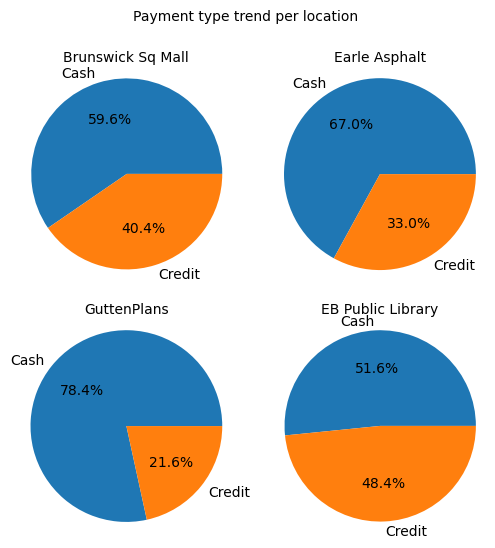

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(6, 6))

for i, l in enumerate(df_sales.Location.unique()):
    plt.subplot(2, 2, i+1)
    ax=draw_payment_type(l)
    set_bar_label(ax)

fig.suptitle('Payment type trend per location\n', fontsize=10)       
plt.show()

- Sales tendency

Will helps us understanding factors affecting sales performance, and guides strategies for growth and profitability

If we compare the total revenue of each machine per month we see that GuttenPlans is achieving more than 400$ in the first four months, but in April, the library vending machine get close in profits, jumping from 200$ March benefit to 600$ in April. Value that keeps increasing from May to June (peak benefit) while the opposite happens to the manufacturing vending machine in this two months. Next four months (July, August, September and October) are well performing months for the library vending machine, reaching near 800$ each month, while GuttenPlans suffer a constant decrement on sales from July to December, having a minimal increment in November.

Another remarkable thing about the library vending machine that we saw in the plot is that there are no transactions in January and February and even with that is one with the most profitability. Which is what are we searching for

Regarding to the less profitable vending machines the mayority of the months the benefits are under 200$, only suprased in June and July by one of the mall vending machines (Zales). 

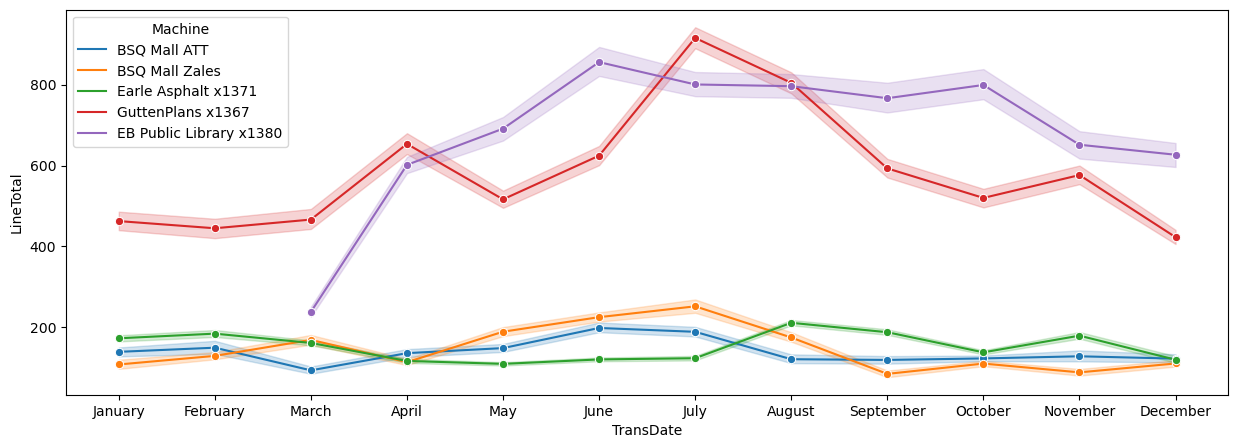

In [38]:
fig = plt.figure(figsize= (15,5))

ax = sns.lineplot(data=df_sales, x=df_sales.TransDate.dt.month_name(), y="LineTotal", hue="Machine", estimator="sum", marker="o")

Between the two mall vending machines there's no really a huge benefit difference

In [39]:
df_sales[df_sales.Machine.str.contains('BSQ Mall')].groupby('Machine')['LineTotal'].sum()

Machine
BSQ Mall ATT      1670.75
BSQ Mall Zales    1757.25
Name: LineTotal, dtype: float64

#### 5. Suggestions to the problem posed

Based on the analysis, it is evident that the vending machine located in the library is the most profitable among the four. As we saw, this come attributed to factors such as high foot traffic, a wide product selection choice, and a location where users potentially stay longer periods. Which increases the likelihood of purchases.

Considering these insights and doing an external search, we found information in this [post](https://eu.mycentraljersey.com/story/news/local/middlesex-county/2018/01/26/east-brunswick-public-library-cuts-operating-hours/1069289001/) that says that in 2017, 348.000 visitors came to EB Public library.

This is a great number, and considering similar types of locations in New Jersey we found a 2016 [article](https://www.njspotlightnews.org/2016/06/16-06-27-the-list-by-the-numbers-new-jersey-s-busiest-public-libraries/) with the most visited New Jersey State libraries. Being the top 5: 
1. Ocean County Library, Toms River: 2,504,362 visitors
2. Somerset County Library, Bridgewater: 1,750,223 visitors
3. Mercer County Library, Lawrenceville: 1,404,589 visitors
4. Monmouth County Library, Manalapan: 1,321,868 visitors
5. Burlington County Library, Westampton: 1,107,694 visitors

Considering that the number of visitors in those locations are quite biger and libraries may be the most promising locations for expansion. It is recommended to consider expanding the vending machine business by strategically placing more machines in locations with similar characteristics to the library. Locations with high foot traffic, a steady flow of potential customers, and a suitable environment for vending machine with similar product offerings should be prioritized.

Also it could be an idea to remove or reduce vending machines in less profitable locations like the Mall.

Furthermore, it is advised to conduct a thorough market research and feasibility study in potential locations to ensure they align with the desired success attributes. This will help mitigate risks and increase the likelihood of success in the expansion endeavor. 